# Sparse Representations with Activity Regularization

Deep learning models are capable of automatically learning a rich internal representation from raw input data. This is called feature or representation learning. Better learned representations, in turn, can lead to better insights into the domain, e.g., via visualization of learned features, and to better predictive models that make use of the learned features. A problem with learned features is that they can be too specialized to the training data or overfit and not generalize well to new examples. Large values in the learned representation can be a sign of the representation being overfitted. Activity or representation regularization provides a technique to encourage the learned representations, the output or activation of the hidden layer or layers of the network, to stay small and sparse. In this tutorial, you will discover activation regularization to improve the generalization of learned features in neural networks. After reading this tutorial, you will know:

* Neural networks learn features from data and models, such as autoencoders and encoder-decoder models, and explicitly seek effective learned representations.
* Similar to weights, large values in learned features, e.g., large activations, may indicate an overfit model.
* Adding penalties to the loss function that penalizes a model in proportion to the magnitude of the activations may result in more robust and generalized learned features.

## Activity Regularization

In this section, you will discover the problem with neural networks with large activity, a technique that you can use to encourage the development of models with a sparse activity called activity regularization, and tips for using this technique in your projects.

### Problem With Learned Features

Deep learning models can perform feature learning. The model will automatically extract the salient features from the input patterns or learn features during the network training. These features may be used in the network to predict a quantity for regression or a class value for classification. The output of a hidden layer within the network represents the model's learned features at that point. These internal representations are tangible things.

A field of study focused on the efficient and effective automatic learning of features, often investigated by having a network reduce input to a small learned feature before using a second network to reconstruct the original input from the learned feature. Models of this type are called auto-encoders, or encoder-decoders, and their learned features can be useful to learn more about the domain (e.g., via visualization) and in predictive models. The learned features, or encoded inputs, must be large enough to capture the salient features of the input but also focused enough to not overfit the specific examples in the training dataset. As such, there is a tension between the expressiveness and the generalization of the learned features.

In the same way, large weights in the network can signify an unstable and overfit model, large output values in the learned features can signify the same problems. It is desirable to have small values in the learned features, e.g., small outputs or activations from the encoder network.

### Encourage Small Activations

The loss function of the network can be updated to penalize models in proportion to the magnitude of their activation. This is similar to weight regularization, where the loss function is updated to penalize the model in proportion to the magnitude of the weights. The output of a layer is referred to as its activation or activity, as such, this form of penalty or regularization is referred to as activation regularization or activity regularization.

The output of an encoder or, generally, the output of a hidden layer in a neural network may represent the problem at that point in the model. As such, this type of penalty may also be referred to as representation regularization. The desire to have small or very few activations with mostly zero values is also called a desire for sparsity. As such, this type of penalty is also referred to as sparse feature learning. The encouragement of sparse learned features in autoencoder models is referred to as sparse autoencoder.

Sparsity is most commonly sought when a larger-than-required hidden layer (e.g., over-complete) is used to learn features that may encourage overfitting. A sparse overcomplete learned feature is more effective than other learned features offering better robustness to noise and even transforms in the input, e.g., learned features of images may have improved invariance to the position of objects in the image. The introduction of a sparsity penalty counters this problem and encourages better generalization.

There is a general focus on the sparsity of the representations rather than small vector magnitudes. A study of these representations that is more general than neural networks is known as sparse coding.

### How to Encourage Small Activations

An activation penalty can be applied per-layer, perhaps only at one layer that focuses on the learned representation, such as the output of the encoder model or the middle (bottleneck) of an autoencoder model. A constraint can be applied that adds a penalty proportional to the magnitude of the vector output of the layer. The activation values may be positive or negative, so we cannot simply sum the values. Two common methods for calculating the magnitude of the activation are:

* Sum of the absolute activation values, called L1 vector norm.
* Sum of the squared activation values, called the L2 vector norm.

The L1 norm encourages sparsity, e.g., allowing some activations to become zero, whereas the L2 norm generally encourages small activations values. Use of the L1 norm may be a more commonly used penalty for activation regularization. A hyperparameter must be specified that indicates the amount or degree that the loss function will weigh or pay attention to the penalty. Common values are on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc. Activity regularization can be used in conjunction with other regularization techniques, such as weight regularization.

### Tips for Using Activation Regularization

This section provides some tips for using activation regularization with your neural network.

**Use With All Network Types**

Activation regularization is a generic approach. It can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks.

**Use With Autoencoders and Encoder-Decoders**

Activity regularization may be best suited to those model types that explicitly seek an efficient learned representation. These include autoencoders (i.e., sparse autoencoders) and encoder-decoder models, such as encoder-decoder LSTMs used for sequence-to-sequence prediction problems.

**Experiment With Different Norms**

The most common activation regularization is the L1 norm, as it encourages sparsity. Experiment with other types of regularization such as the L2 norm or using both the L1 and L2 norms simultaneously, e.g., the Elastic Net linear regression algorithm.

**Use Rectified Linear Activation**

The rectified linear activation function, also called relu, is an activation function that is now widely used in the hidden layer of deep neural networks. Unlike classical activation functions such as tanh (hyperbolic tangent function) and sigmoid (logistic function), the relu function easily allows exact zero values. This makes it a good candidate when learning sparse representations, such as with the L1 vector norm activation regularization.

**Grid Search Parameters**

It is common to use small values for the regularization hyperparameter that controls the contribution of each activation to the penalty. Perhaps start by testing values on a log scale, such as 0.1, 0.001, and 0.0001. Then use a grid search at the order of magnitude that shows the most promise.

**Standardize Input Data**

It is a generally good practice to rescale input variables to have the same scale. When input variables have different scales, the scale of the network's weights will, in turn, vary accordingly. Large weights can saturate the nonlinear transfer function and reduce the variance in the output from the layer. This may introduce a problem when using activation regularization. This problem can be addressed by either normalizing or standardizing input variables.

**Use an Overcomplete Representation**

Configure the layer chosen to be the learned features, e.g., the output of the encoder or the bottleneck in the autoencoder, to have more nodes that may be required. This is called an overcomplete representation that will encourage the network to overfit the training examples. This can be countered with a strong activation regularization to encourage a rich, learned representation that is also sparse.

## Activity Regularization Case Study

In this section, we will demonstrate how to use activity regularization to reduce the overfitting of an MLP on a simple binary classification problem.  Although activity regularization is most often used to encourage sparse learned representations in autoencoder and encoder-decoder models, it can also be used directly within normal neural networks to achieve the same effect and improve the model's generalization. This example provides a template for applying activity regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

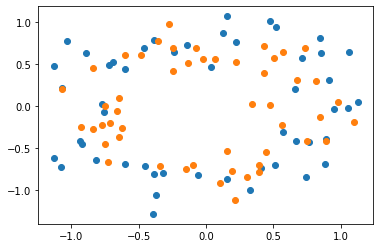

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 844ms/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.4857
Epoch 2/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6869 - accuracy: 0.6000 - val_loss: 0.6957 - val_accuracy: 0.4857
Epoch 4/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6835 - accuracy: 0.6000 - val_loss: 0.6978 - val_accuracy: 0.4571
Epoch 5/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6802 - accuracy: 0.6000 - val_loss: 0.7000 - val_accuracy: 0.4429
Epoch 6/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6770 - accuracy: 0.5667 - val_loss: 0.7022 - val_accuracy: 0.4429
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6739 - accuracy: 0.5667 - val_loss: 0.7045 - val_accuracy: 0.4429
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5940 - accuracy: 0.6667 - val_loss: 0.7935 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5931 - accuracy: 0.6333 - val_loss: 0.7939 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5921 - accuracy: 0.6333 - val_loss: 0.7943 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5911 - accuracy: 0.6333 - val_loss: 0.7947 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5902 - accuracy: 0.6333 - val_loss: 0.7951 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5892 - accuracy: 0.6333 - val_loss: 0.7955 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5883 - accuracy: 0.6333 - val_loss: 0.7959 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5109 - accuracy: 0.7000 - val_loss: 0.7944 - val_accuracy: 0.5286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5104 - accuracy: 0.7000 - val_loss: 0.7942 - val_accuracy: 0.5286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5098 - accuracy: 0.7000 - val_loss: 0.7941 - val_accuracy: 0.5286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5092 - accuracy: 0.7000 - val_loss: 0.7939 - val_accuracy: 0.5286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5086 - accuracy: 0.7000 - val_loss: 0.7938 - val_accuracy: 0.5286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5080 - accuracy: 0.7000 - val_loss: 0.7937 - val_accuracy: 0.5286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5074 - accuracy: 0.7000 - val_loss: 0.7935 - val_accuracy: 0.5286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4474 - accuracy: 0.7667 - val_loss: 0.7768 - val_accuracy: 0.5286
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4468 - accuracy: 0.7667 - val_loss: 0.7767 - val_accuracy: 0.5286
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4463 - accuracy: 0.7667 - val_loss: 0.7768 - val_accuracy: 0.5286
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4457 - accuracy: 0.7667 - val_loss: 0.7769 - val_accuracy: 0.5286
Epoch 291/4000
1/1 [==============================] - 0s 31ms/step - loss: 0.4452 - accuracy: 0.7667 - val_loss: 0.7771 - val_accuracy: 0.5286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4447 - accuracy: 0.7667 - val_loss: 0.7772 - val_accuracy: 0.5286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4442 - accuracy: 0.7667 - val_loss: 0.7772 - val_accuracy: 0.5286
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3928 - accuracy: 0.8000 - val_loss: 0.8077 - val_accuracy: 0.5429
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3924 - accuracy: 0.8000 - val_loss: 0.8083 - val_accuracy: 0.5429
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3920 - accuracy: 0.8000 - val_loss: 0.8089 - val_accuracy: 0.5429
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3915 - accuracy: 0.8000 - val_loss: 0.8096 - val_accuracy: 0.5429
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3911 - accuracy: 0.8333 - val_loss: 0.8104 - val_accuracy: 0.5429
Epoch 406/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.3906 - accuracy: 0.8333 - val_loss: 0.8111 - val_accuracy: 0.5429
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3902 - accuracy: 0.8333 - val_loss: 0.8118 - val_accuracy: 0.5429
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3446 - accuracy: 0.8667 - val_loss: 0.8954 - val_accuracy: 0.5571
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3442 - accuracy: 0.8667 - val_loss: 0.8965 - val_accuracy: 0.5571
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3438 - accuracy: 0.8667 - val_loss: 0.8975 - val_accuracy: 0.5571
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3434 - accuracy: 0.8667 - val_loss: 0.8984 - val_accuracy: 0.5571
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3430 - accuracy: 0.8667 - val_loss: 0.8992 - val_accuracy: 0.5571
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3426 - accuracy: 0.8667 - val_loss: 0.9000 - val_accuracy: 0.5571
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3422 - accuracy: 0.8667 - val_loss: 0.9008 - val_accuracy: 0.5571
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2985 - accuracy: 0.8667 - val_loss: 1.0224 - val_accuracy: 0.5714
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2981 - accuracy: 0.8667 - val_loss: 1.0239 - val_accuracy: 0.5714
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2977 - accuracy: 0.9000 - val_loss: 1.0252 - val_accuracy: 0.5714
Epoch 632/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2973 - accuracy: 0.9000 - val_loss: 1.0263 - val_accuracy: 0.5714
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2969 - accuracy: 0.9000 - val_loss: 1.0272 - val_accuracy: 0.5714
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2965 - accuracy: 0.9000 - val_loss: 1.0283 - val_accuracy: 0.5714
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2961 - accuracy: 0.9000 - val_loss: 1.0297 - val_accuracy: 0.5714
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2563 - accuracy: 0.9333 - val_loss: 1.1769 - val_accuracy: 0.5571
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2560 - accuracy: 0.9333 - val_loss: 1.1785 - val_accuracy: 0.5571
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2556 - accuracy: 0.9333 - val_loss: 1.1801 - val_accuracy: 0.5571
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2553 - accuracy: 0.9333 - val_loss: 1.1817 - val_accuracy: 0.5571
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2549 - accuracy: 0.9333 - val_loss: 1.1834 - val_accuracy: 0.5571
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2546 - accuracy: 0.9333 - val_loss: 1.1849 - val_accuracy: 0.5429
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2542 - accuracy: 0.9333 - val_loss: 1.1866 - val_accuracy: 0.5429
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2212 - accuracy: 0.9333 - val_loss: 1.3451 - val_accuracy: 0.5143
Epoch 858/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2210 - accuracy: 0.9333 - val_loss: 1.3464 - val_accuracy: 0.5143
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2207 - accuracy: 0.9333 - val_loss: 1.3480 - val_accuracy: 0.5143
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2204 - accuracy: 0.9333 - val_loss: 1.3497 - val_accuracy: 0.5143
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2201 - accuracy: 0.9333 - val_loss: 1.3514 - val_accuracy: 0.5143
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2198 - accuracy: 0.9333 - val_loss: 1.3532 - val_accuracy: 0.5143
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2196 - accuracy: 0.9333 - val_loss: 1.3551 - val_accuracy: 0.5143
Epoch 864/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.1928 - accuracy: 0.9333 - val_loss: 1.5137 - val_accuracy: 0.5143
Epoch 972/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1925 - accuracy: 0.9333 - val_loss: 1.5150 - val_accuracy: 0.5143
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1923 - accuracy: 0.9333 - val_loss: 1.5158 - val_accuracy: 0.5143
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1921 - accuracy: 0.9333 - val_loss: 1.5167 - val_accuracy: 0.5143
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1919 - accuracy: 0.9333 - val_loss: 1.5179 - val_accuracy: 0.5143
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1917 - accuracy: 0.9333 - val_loss: 1.5196 - val_accuracy: 0.5143
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1915 - accuracy: 0.9333 - val_loss: 1.5215 - val_accuracy: 0.5143
Epoch 978/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.1693 - accuracy: 0.9333 - val_loss: 1.6589 - val_accuracy: 0.5143
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1690 - accuracy: 0.9333 - val_loss: 1.6598 - val_accuracy: 0.5143
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1688 - accuracy: 0.9333 - val_loss: 1.6609 - val_accuracy: 0.5143
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1687 - accuracy: 0.9333 - val_loss: 1.6623 - val_accuracy: 0.5143
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1685 - accuracy: 0.9333 - val_loss: 1.6638 - val_accuracy: 0.5143
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1683 - accuracy: 0.9333 - val_loss: 1.6653 - val_accuracy: 0.5143
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1681 - accuracy: 0.9333 - val_loss: 1.6665 - val_accuracy: 0.5143
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.1587 - accuracy: 0.9667 - val_loss: 1.7275 - val_accuracy: 0.5143
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1586 - accuracy: 0.9667 - val_loss: 1.7285 - val_accuracy: 0.5143
Epoch 1144/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1584 - accuracy: 0.9667 - val_loss: 1.7298 - val_accuracy: 0.5143
Epoch 1145/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1582 - accuracy: 0.9667 - val_loss: 1.7311 - val_accuracy: 0.5143
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1580 - accuracy: 0.9667 - val_loss: 1.7326 - val_accuracy: 0.5143
Epoch 1147/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1579 - accuracy: 0.9667 - val_loss: 1.7337 - val_accuracy: 0.5143
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1577 - accuracy: 0.9667 - val_loss: 1.7349 - val_accuracy: 0.5143
Epoch 11

1/1 [==============================] - 0s 23ms/step - loss: 0.1490 - accuracy: 0.9667 - val_loss: 1.7955 - val_accuracy: 0.5286
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1488 - accuracy: 0.9667 - val_loss: 1.7967 - val_accuracy: 0.5286
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1487 - accuracy: 0.9667 - val_loss: 1.7982 - val_accuracy: 0.5286
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1485 - accuracy: 0.9667 - val_loss: 1.7996 - val_accuracy: 0.5286
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1484 - accuracy: 0.9667 - val_loss: 1.8009 - val_accuracy: 0.5286
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1482 - accuracy: 0.9667 - val_loss: 1.8022 - val_accuracy: 0.5286
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1480 - accuracy: 0.9667 - val_loss: 1.8036 - val_accuracy: 0.5286
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.1399 - accuracy: 0.9667 - val_loss: 1.8629 - val_accuracy: 0.5429
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1398 - accuracy: 0.9667 - val_loss: 1.8647 - val_accuracy: 0.5429
Epoch 1258/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1396 - accuracy: 0.9667 - val_loss: 1.8662 - val_accuracy: 0.5429
Epoch 1259/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1394 - accuracy: 0.9667 - val_loss: 1.8677 - val_accuracy: 0.5429
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1393 - accuracy: 0.9667 - val_loss: 1.8689 - val_accuracy: 0.5429
Epoch 1261/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1392 - accuracy: 0.9667 - val_loss: 1.8704 - val_accuracy: 0.5429
Epoch 1262/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1390 - accuracy: 0.9667 - val_loss: 1.8716 - val_accuracy: 0.5429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.1316 - accuracy: 0.9667 - val_loss: 1.9320 - val_accuracy: 0.5429
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1315 - accuracy: 0.9667 - val_loss: 1.9331 - val_accuracy: 0.5429
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1314 - accuracy: 0.9667 - val_loss: 1.9343 - val_accuracy: 0.5429
Epoch 1316/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1312 - accuracy: 0.9667 - val_loss: 1.9359 - val_accuracy: 0.5429
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1311 - accuracy: 0.9667 - val_loss: 1.9377 - val_accuracy: 0.5429
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1309 - accuracy: 0.9667 - val_loss: 1.9391 - val_accuracy: 0.5429
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1308 - accuracy: 0.9667 - val_loss: 1.9403 - val_accuracy: 0.5429
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 2.0020 - val_accuracy: 0.5429
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1239 - accuracy: 0.9667 - val_loss: 2.0030 - val_accuracy: 0.5429
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1238 - accuracy: 0.9667 - val_loss: 2.0042 - val_accuracy: 0.5429
Epoch 1373/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1236 - accuracy: 0.9667 - val_loss: 2.0051 - val_accuracy: 0.5429
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1235 - accuracy: 0.9667 - val_loss: 2.0064 - val_accuracy: 0.5429
Epoch 1375/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1234 - accuracy: 0.9667 - val_loss: 2.0077 - val_accuracy: 0.5429
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1233 - accuracy: 0.9667 - val_loss: 2.0087 - val_accuracy: 0.5429
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1167 - accuracy: 0.9667 - val_loss: 2.0690 - val_accuracy: 0.5571
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1166 - accuracy: 0.9667 - val_loss: 2.0700 - val_accuracy: 0.5571
Epoch 1429/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1165 - accuracy: 0.9667 - val_loss: 2.0711 - val_accuracy: 0.5571
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1164 - accuracy: 0.9667 - val_loss: 2.0722 - val_accuracy: 0.5571
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1162 - accuracy: 0.9667 - val_loss: 2.0733 - val_accuracy: 0.5571
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1161 - accuracy: 0.9667 - val_loss: 2.0745 - val_accuracy: 0.5571
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1160 - accuracy: 0.9667 - val_loss: 2.0760 - val_accuracy: 0.5571
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 2.1375 - val_accuracy: 0.5571
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1102 - accuracy: 0.9667 - val_loss: 2.1385 - val_accuracy: 0.5571
Epoch 1486/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 2.1395 - val_accuracy: 0.5571
Epoch 1487/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1100 - accuracy: 0.9667 - val_loss: 2.1410 - val_accuracy: 0.5571
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 2.1422 - val_accuracy: 0.5571
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 2.1434 - val_accuracy: 0.5571
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 2.1443 - val_accuracy: 0.5571
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 2.2057 - val_accuracy: 0.5571
Epoch 1542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 2.2070 - val_accuracy: 0.5571
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1042 - accuracy: 0.9667 - val_loss: 2.2082 - val_accuracy: 0.5571
Epoch 1544/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 2.2097 - val_accuracy: 0.5571
Epoch 1545/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1040 - accuracy: 0.9667 - val_loss: 2.2114 - val_accuracy: 0.5571
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1039 - accuracy: 0.9667 - val_loss: 2.2130 - val_accuracy: 0.5571
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 2.2143 - val_accuracy: 0.5571
Epoch 15

1/1 [==============================] - 0s 23ms/step - loss: 0.0987 - accuracy: 0.9667 - val_loss: 2.2735 - val_accuracy: 0.5571
Epoch 1599/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0986 - accuracy: 0.9667 - val_loss: 2.2746 - val_accuracy: 0.5571
Epoch 1600/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0985 - accuracy: 0.9667 - val_loss: 2.2756 - val_accuracy: 0.5571
Epoch 1601/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0984 - accuracy: 0.9667 - val_loss: 2.2767 - val_accuracy: 0.5571
Epoch 1602/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0983 - accuracy: 0.9667 - val_loss: 2.2778 - val_accuracy: 0.5571
Epoch 1603/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0982 - accuracy: 0.9667 - val_loss: 2.2791 - val_accuracy: 0.5571
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0981 - accuracy: 0.9667 - val_loss: 2.2805 - val_accuracy: 0.5571
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0936 - accuracy: 0.9667 - val_loss: 2.3431 - val_accuracy: 0.5571
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0935 - accuracy: 0.9667 - val_loss: 2.3446 - val_accuracy: 0.5571
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0934 - accuracy: 0.9667 - val_loss: 2.3462 - val_accuracy: 0.5571
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0933 - accuracy: 0.9667 - val_loss: 2.3475 - val_accuracy: 0.5571
Epoch 1659/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0933 - accuracy: 0.9667 - val_loss: 2.3483 - val_accuracy: 0.5571
Epoch 1660/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0932 - accuracy: 0.9667 - val_loss: 2.3490 - val_accuracy: 0.5571
Epoch 1661/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0931 - accuracy: 0.9667 - val_loss: 2.3503 - val_accuracy: 0.5571
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0889 - accuracy: 0.9667 - val_loss: 2.4130 - val_accuracy: 0.5571
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0889 - accuracy: 0.9667 - val_loss: 2.4140 - val_accuracy: 0.5571
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 2.4154 - val_accuracy: 0.5571
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0887 - accuracy: 0.9667 - val_loss: 2.4167 - val_accuracy: 0.5571
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 2.4178 - val_accuracy: 0.5571
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 2.4190 - val_accuracy: 0.5571
Epoch 1718/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0885 - accuracy: 0.9667 - val_loss: 2.4202 - val_accuracy: 0.5571
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0847 - accuracy: 0.9667 - val_loss: 2.4820 - val_accuracy: 0.5571
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0846 - accuracy: 0.9667 - val_loss: 2.4828 - val_accuracy: 0.5571
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0845 - accuracy: 0.9667 - val_loss: 2.4838 - val_accuracy: 0.5571
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0845 - accuracy: 0.9667 - val_loss: 2.4851 - val_accuracy: 0.5571
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 2.4866 - val_accuracy: 0.5571
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 2.4880 - val_accuracy: 0.5571
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 2.4891 - val_accuracy: 0.5571
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0808 - accuracy: 0.9667 - val_loss: 2.5498 - val_accuracy: 0.5571
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0807 - accuracy: 0.9667 - val_loss: 2.5511 - val_accuracy: 0.5571
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0807 - accuracy: 0.9667 - val_loss: 2.5529 - val_accuracy: 0.5571
Epoch 1829/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0806 - accuracy: 0.9667 - val_loss: 2.5546 - val_accuracy: 0.5571
Epoch 1830/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0805 - accuracy: 0.9667 - val_loss: 2.5562 - val_accuracy: 0.5571
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0805 - accuracy: 0.9667 - val_loss: 2.5575 - val_accuracy: 0.5571
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0804 - accuracy: 0.9667 - val_loss: 2.5587 - val_accuracy: 0.5571
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0772 - accuracy: 0.9667 - val_loss: 2.6171 - val_accuracy: 0.5571
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0771 - accuracy: 0.9667 - val_loss: 2.6186 - val_accuracy: 0.5571
Epoch 1885/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0770 - accuracy: 0.9667 - val_loss: 2.6201 - val_accuracy: 0.5571
Epoch 1886/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0770 - accuracy: 0.9667 - val_loss: 2.6215 - val_accuracy: 0.5571
Epoch 1887/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0769 - accuracy: 0.9667 - val_loss: 2.6226 - val_accuracy: 0.5571
Epoch 1888/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0769 - accuracy: 0.9667 - val_loss: 2.6236 - val_accuracy: 0.5571
Epoch 1889/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0768 - accuracy: 0.9667 - val_loss: 2.6247 - val_accuracy: 0.5571
Epoch 18

1/1 [==============================] - 0s 23ms/step - loss: 0.0739 - accuracy: 0.9667 - val_loss: 2.6834 - val_accuracy: 0.5571
Epoch 1941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0738 - accuracy: 0.9667 - val_loss: 2.6845 - val_accuracy: 0.5571
Epoch 1942/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 2.6858 - val_accuracy: 0.5571
Epoch 1943/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 2.6874 - val_accuracy: 0.5571
Epoch 1944/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 2.6891 - val_accuracy: 0.5571
Epoch 1945/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0736 - accuracy: 0.9667 - val_loss: 2.6906 - val_accuracy: 0.5571
Epoch 1946/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0735 - accuracy: 0.9667 - val_loss: 2.6913 - val_accuracy: 0.5571
Epoch 19

1/1 [==============================] - 0s 23ms/step - loss: 0.0707 - accuracy: 0.9667 - val_loss: 2.7505 - val_accuracy: 0.5714
Epoch 1998/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0707 - accuracy: 0.9667 - val_loss: 2.7514 - val_accuracy: 0.5714
Epoch 1999/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0706 - accuracy: 0.9667 - val_loss: 2.7528 - val_accuracy: 0.5714
Epoch 2000/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0705 - accuracy: 0.9667 - val_loss: 2.7542 - val_accuracy: 0.5714
Epoch 2001/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0704 - accuracy: 0.9667 - val_loss: 2.7551 - val_accuracy: 0.5714
Epoch 2002/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0703 - accuracy: 0.9667 - val_loss: 2.7560 - val_accuracy: 0.5714
Epoch 2003/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0702 - accuracy: 1.0000 - val_loss: 2.7575 - val_accuracy: 0.5714
Epoch 20

1/1 [==============================] - 0s 23ms/step - loss: 0.0674 - accuracy: 1.0000 - val_loss: 2.8079 - val_accuracy: 0.5714
Epoch 2055/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 2.8096 - val_accuracy: 0.5714
Epoch 2056/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 2.8113 - val_accuracy: 0.5714
Epoch 2057/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 2.8124 - val_accuracy: 0.5714
Epoch 2058/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0672 - accuracy: 1.0000 - val_loss: 2.8133 - val_accuracy: 0.5714
Epoch 2059/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 2.8147 - val_accuracy: 0.5714
Epoch 2060/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 2.8158 - val_accuracy: 0.5714
Epoch 20

1/1 [==============================] - 0s 23ms/step - loss: 0.0647 - accuracy: 1.0000 - val_loss: 2.8678 - val_accuracy: 0.5714
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 2.8695 - val_accuracy: 0.5714
Epoch 2113/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 2.8707 - val_accuracy: 0.5714
Epoch 2114/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0645 - accuracy: 1.0000 - val_loss: 2.8718 - val_accuracy: 0.5714
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0645 - accuracy: 1.0000 - val_loss: 2.8727 - val_accuracy: 0.5714
Epoch 2116/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0644 - accuracy: 1.0000 - val_loss: 2.8734 - val_accuracy: 0.5714
Epoch 2117/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0644 - accuracy: 1.0000 - val_loss: 2.8742 - val_accuracy: 0.5714
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0620 - accuracy: 1.0000 - val_loss: 2.9269 - val_accuracy: 0.5714
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0620 - accuracy: 1.0000 - val_loss: 2.9284 - val_accuracy: 0.5714
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0620 - accuracy: 1.0000 - val_loss: 2.9298 - val_accuracy: 0.5714
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 2.9311 - val_accuracy: 0.5714
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 2.9329 - val_accuracy: 0.5714
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 2.9343 - val_accuracy: 0.5714
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 2.9351 - val_accuracy: 0.5714
Epoch 21

1/1 [==============================] - 0s 23ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 2.9866 - val_accuracy: 0.5714
Epoch 2226/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 2.9874 - val_accuracy: 0.5714
Epoch 2227/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 2.9884 - val_accuracy: 0.5714
Epoch 2228/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 2.9891 - val_accuracy: 0.5714
Epoch 2229/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 2.9899 - val_accuracy: 0.5714
Epoch 2230/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0595 - accuracy: 1.0000 - val_loss: 2.9913 - val_accuracy: 0.5714
Epoch 2231/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 2.9929 - val_accuracy: 0.5714
Epoch 22

1/1 [==============================] - 0s 23ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.0451 - val_accuracy: 0.5714
Epoch 2283/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.0457 - val_accuracy: 0.5714
Epoch 2284/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.0466 - val_accuracy: 0.5714
Epoch 2285/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 3.0477 - val_accuracy: 0.5714
Epoch 2286/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 3.0486 - val_accuracy: 0.5714
Epoch 2287/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 3.0493 - val_accuracy: 0.5714
Epoch 2288/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0572 - accuracy: 1.0000 - val_loss: 3.0502 - val_accuracy: 0.5714
Epoch 22

1/1 [==============================] - 0s 23ms/step - loss: 0.0554 - accuracy: 1.0000 - val_loss: 3.1041 - val_accuracy: 0.5714
Epoch 2340/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0554 - accuracy: 1.0000 - val_loss: 3.1050 - val_accuracy: 0.5714
Epoch 2341/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.1063 - val_accuracy: 0.5714
Epoch 2342/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.1073 - val_accuracy: 0.5714
Epoch 2343/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.1077 - val_accuracy: 0.5714
Epoch 2344/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 3.1088 - val_accuracy: 0.5714
Epoch 2345/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 3.1099 - val_accuracy: 0.5714
Epoch 23

1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - accuracy: 1.0000 - val_loss: 3.1673 - val_accuracy: 0.5714
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - accuracy: 1.0000 - val_loss: 3.1685 - val_accuracy: 0.5714
Epoch 2398/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - accuracy: 1.0000 - val_loss: 3.1694 - val_accuracy: 0.5714
Epoch 2399/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 3.1705 - val_accuracy: 0.5714
Epoch 2400/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 3.1716 - val_accuracy: 0.5714
Epoch 2401/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 3.1726 - val_accuracy: 0.5714
Epoch 2402/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 3.1743 - val_accuracy: 0.5714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 3.2274 - val_accuracy: 0.5714
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 3.2285 - val_accuracy: 0.5714
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 3.2300 - val_accuracy: 0.5714
Epoch 2456/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 3.2307 - val_accuracy: 0.5714
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 3.2326 - val_accuracy: 0.5714
Epoch 2458/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 3.2338 - val_accuracy: 0.5714
Epoch 2459/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 3.2340 - val_accuracy: 0.5714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 3.2899 - val_accuracy: 0.5714
Epoch 2511/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 3.2916 - val_accuracy: 0.5714
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 3.2930 - val_accuracy: 0.5714
Epoch 2513/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 3.2945 - val_accuracy: 0.5714
Epoch 2514/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0501 - accuracy: 1.0000 - val_loss: 3.2970 - val_accuracy: 0.5714
Epoch 2515/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 3.2986 - val_accuracy: 0.5714
Epoch 2516/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 3.2996 - val_accuracy: 0.5714
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 3.3568 - val_accuracy: 0.5714
Epoch 2568/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 3.3577 - val_accuracy: 0.5714
Epoch 2569/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0486 - accuracy: 1.0000 - val_loss: 3.3583 - val_accuracy: 0.5714
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.3591 - val_accuracy: 0.5714
Epoch 2571/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.3599 - val_accuracy: 0.5714
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.3607 - val_accuracy: 0.5714
Epoch 2573/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.3616 - val_accuracy: 0.5714
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.4187 - val_accuracy: 0.5714
Epoch 2625/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.4198 - val_accuracy: 0.5714
Epoch 2626/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.4209 - val_accuracy: 0.5714
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 3.4216 - val_accuracy: 0.5714
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 3.4221 - val_accuracy: 0.5714
Epoch 2629/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 3.4232 - val_accuracy: 0.5714
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 3.4237 - val_accuracy: 0.5714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.4793 - val_accuracy: 0.5714
Epoch 2682/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.4806 - val_accuracy: 0.5714
Epoch 2683/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.4826 - val_accuracy: 0.5714
Epoch 2684/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.4836 - val_accuracy: 0.5714
Epoch 2685/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.4838 - val_accuracy: 0.5714
Epoch 2686/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.4850 - val_accuracy: 0.5714
Epoch 2687/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.4853 - val_accuracy: 0.5714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.5386 - val_accuracy: 0.5714
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.5396 - val_accuracy: 0.5714
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.5411 - val_accuracy: 0.5714
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.5426 - val_accuracy: 0.5714
Epoch 2742/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.5425 - val_accuracy: 0.5714
Epoch 2743/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.5450 - val_accuracy: 0.5714
Epoch 2744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 3.5463 - val_accuracy: 0.5714
Epoch 27

1/1 [==============================] - 0s 23ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.5992 - val_accuracy: 0.5714
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.5989 - val_accuracy: 0.5714
Epoch 2797/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.5997 - val_accuracy: 0.5714
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.6005 - val_accuracy: 0.5714
Epoch 2799/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.6005 - val_accuracy: 0.5714
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.6018 - val_accuracy: 0.5714
Epoch 2801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 3.6029 - val_accuracy: 0.5714
Epoch 28

1/1 [==============================] - 0s 23ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.6580 - val_accuracy: 0.5714
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.6600 - val_accuracy: 0.5714
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.6615 - val_accuracy: 0.5714
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 3.6622 - val_accuracy: 0.5714
Epoch 2856/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 3.6635 - val_accuracy: 0.5714
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 3.6645 - val_accuracy: 0.5714
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 3.6649 - val_accuracy: 0.5714
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 3.7196 - val_accuracy: 0.5714
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 3.7203 - val_accuracy: 0.5714
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 3.7213 - val_accuracy: 0.5714
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 3.7218 - val_accuracy: 0.5714
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 3.7229 - val_accuracy: 0.5714
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 3.7247 - val_accuracy: 0.5714
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 3.7254 - val_accuracy: 0.5714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 3.7790 - val_accuracy: 0.5714
Epoch 2967/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 3.7806 - val_accuracy: 0.5714
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 3.7820 - val_accuracy: 0.5714
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 3.7829 - val_accuracy: 0.5714
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 3.7841 - val_accuracy: 0.5714
Epoch 2971/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 3.7848 - val_accuracy: 0.5714
Epoch 2972/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 3.7855 - val_accuracy: 0.5714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 3.8406 - val_accuracy: 0.5714
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8417 - val_accuracy: 0.5714
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8439 - val_accuracy: 0.5714
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8444 - val_accuracy: 0.5714
Epoch 3027/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8462 - val_accuracy: 0.5714
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8479 - val_accuracy: 0.5714
Epoch 3029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.8490 - val_accuracy: 0.5714
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9054 - val_accuracy: 0.5714
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9078 - val_accuracy: 0.5714
Epoch 3082/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9086 - val_accuracy: 0.5714
Epoch 3083/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9104 - val_accuracy: 0.5714
Epoch 3084/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9119 - val_accuracy: 0.5714
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.9120 - val_accuracy: 0.5714
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.9143 - val_accuracy: 0.5714
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 3.9654 - val_accuracy: 0.5714
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 3.9659 - val_accuracy: 0.5714
Epoch 3139/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 3.9679 - val_accuracy: 0.5714
Epoch 3140/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 3.9685 - val_accuracy: 0.5714
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 3.9696 - val_accuracy: 0.5714
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 3.9710 - val_accuracy: 0.5714
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 3.9714 - val_accuracy: 0.5714
Epoch 31

1/1 [==============================] - 0s 22ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 4.0285 - val_accuracy: 0.5571
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 4.0292 - val_accuracy: 0.5571
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 4.0304 - val_accuracy: 0.5571
Epoch 3197/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 4.0319 - val_accuracy: 0.5571
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 4.0324 - val_accuracy: 0.5571
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 4.0340 - val_accuracy: 0.5571
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 4.0352 - val_accuracy: 0.5571
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 4.0960 - val_accuracy: 0.5571
Epoch 3252/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.0979 - val_accuracy: 0.5571
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.0976 - val_accuracy: 0.5571
Epoch 3254/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.0991 - val_accuracy: 0.5571
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.1009 - val_accuracy: 0.5571
Epoch 3256/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.1022 - val_accuracy: 0.5571
Epoch 3257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 4.1038 - val_accuracy: 0.5571
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1600 - val_accuracy: 0.5571
Epoch 3309/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1614 - val_accuracy: 0.5571
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1626 - val_accuracy: 0.5571
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1639 - val_accuracy: 0.5571
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1654 - val_accuracy: 0.5571
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1668 - val_accuracy: 0.5571
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 4.1705 - val_accuracy: 0.5571
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 4.2332 - val_accuracy: 0.5571
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2337 - val_accuracy: 0.5571
Epoch 3367/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2347 - val_accuracy: 0.5571
Epoch 3368/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2355 - val_accuracy: 0.5571
Epoch 3369/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2364 - val_accuracy: 0.5571
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2383 - val_accuracy: 0.5571
Epoch 3371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.2385 - val_accuracy: 0.5571
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 4.2996 - val_accuracy: 0.5429
Epoch 3423/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 4.3018 - val_accuracy: 0.5429
Epoch 3424/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 4.3023 - val_accuracy: 0.5429
Epoch 3425/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 4.3041 - val_accuracy: 0.5429
Epoch 3426/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.3050 - val_accuracy: 0.5429
Epoch 3427/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.3060 - val_accuracy: 0.5429
Epoch 3428/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.3077 - val_accuracy: 0.5429
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3704 - val_accuracy: 0.5429
Epoch 3480/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3715 - val_accuracy: 0.5429
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3732 - val_accuracy: 0.5429
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3748 - val_accuracy: 0.5429
Epoch 3483/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3763 - val_accuracy: 0.5429
Epoch 3484/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3783 - val_accuracy: 0.5429
Epoch 3485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.3792 - val_accuracy: 0.5429
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.4452 - val_accuracy: 0.5429
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.4469 - val_accuracy: 0.5429
Epoch 3538/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4473 - val_accuracy: 0.5429
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4508 - val_accuracy: 0.5429
Epoch 3540/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4502 - val_accuracy: 0.5429
Epoch 3541/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4532 - val_accuracy: 0.5429
Epoch 3542/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4530 - val_accuracy: 0.5429
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.5158 - val_accuracy: 0.5429
Epoch 3594/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5160 - val_accuracy: 0.5429
Epoch 3595/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5181 - val_accuracy: 0.5429
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5178 - val_accuracy: 0.5429
Epoch 3597/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5199 - val_accuracy: 0.5429
Epoch 3598/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5199 - val_accuracy: 0.5429
Epoch 3599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5206 - val_accuracy: 0.5429
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5858 - val_accuracy: 0.5429
Epoch 3651/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5872 - val_accuracy: 0.5429
Epoch 3652/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5899 - val_accuracy: 0.5429
Epoch 3653/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5915 - val_accuracy: 0.5429
Epoch 3654/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5928 - val_accuracy: 0.5429
Epoch 3655/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.5951 - val_accuracy: 0.5429
Epoch 3656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 4.5955 - val_accuracy: 0.5429
Epoch 36

1/1 [==============================] - 0s 23ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 4.6626 - val_accuracy: 0.5429
Epoch 3708/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 4.6614 - val_accuracy: 0.5429
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 4.6630 - val_accuracy: 0.5429
Epoch 3710/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 4.6630 - val_accuracy: 0.5429
Epoch 3711/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 4.6647 - val_accuracy: 0.5429
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 4.6672 - val_accuracy: 0.5429
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 4.6698 - val_accuracy: 0.5429
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7252 - val_accuracy: 0.5429
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7272 - val_accuracy: 0.5429
Epoch 3766/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7276 - val_accuracy: 0.5429
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7297 - val_accuracy: 0.5429
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7300 - val_accuracy: 0.5429
Epoch 3769/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7324 - val_accuracy: 0.5429
Epoch 3770/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.7327 - val_accuracy: 0.5429
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 4.7933 - val_accuracy: 0.5429
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 4.7937 - val_accuracy: 0.5429
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 4.7960 - val_accuracy: 0.5429
Epoch 3824/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 4.7968 - val_accuracy: 0.5429
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 4.7988 - val_accuracy: 0.5429
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 4.8003 - val_accuracy: 0.5429
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 4.8016 - val_accuracy: 0.5429
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8610 - val_accuracy: 0.5429
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8606 - val_accuracy: 0.5429
Epoch 3880/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8637 - val_accuracy: 0.5429
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8633 - val_accuracy: 0.5429
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8682 - val_accuracy: 0.5429
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8681 - val_accuracy: 0.5429
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 4.8743 - val_accuracy: 0.5429
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 4.9319 - val_accuracy: 0.5429
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 4.9333 - val_accuracy: 0.5429
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 4.9346 - val_accuracy: 0.5429
Epoch 3938/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 4.9356 - val_accuracy: 0.5429
Epoch 3939/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 4.9366 - val_accuracy: 0.5429
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 4.9377 - val_accuracy: 0.5429
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 4.9387 - val_accuracy: 0.5429
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0017 - val_accuracy: 0.5429
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0013 - val_accuracy: 0.5429
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0036 - val_accuracy: 0.5429
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0036 - val_accuracy: 0.5429
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0075 - val_accuracy: 0.5429
Epoch 3997/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0074 - val_accuracy: 0.5429
Epoch 3998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 5.0110 - val_accuracy: 0.5429
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.543


Finally, we will plot the model's performance on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of cross-entropy loss and classification accuracy to show the pattern of overfitting. That is an improvement on both train and test sets until an inflection point, after which performance continues to improve for the train set and begins to get worse for the test set.

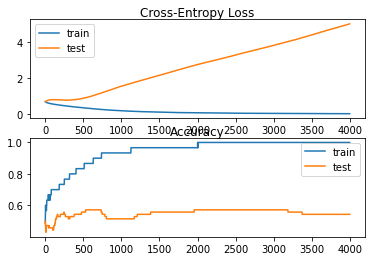

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/4000
1/1 [==============================] - 0s 265ms/step - loss: 0.6862 - accuracy: 0.5667 - val_loss: 0.6965 - val_accuracy: 0.4714
Epoch 2/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6826 - accuracy: 0.5667 - val_loss: 0.6986 - val_accuracy: 0.4429
Epoch 3/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6791 - accuracy: 0.5667 - val_loss: 0.7007 - val_accuracy: 0.4714
Epoch 4/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6757 - accuracy: 0.6000 - val_loss: 0.7030 - val_accuracy: 0.4571
Epoch 5/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6725 - accuracy: 0.6000 - val_loss: 0.7053 - val_accuracy: 0.4286
Epoch 6/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.6695 - accuracy: 0.5333 - val_loss: 0.7076 - val_accuracy: 0.4286
Epoch 7/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6665 - accuracy: 0.5667 - val_loss: 0.7100 - val_accuracy: 0.4286
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5891 - accuracy: 0.6333 - val_loss: 0.7907 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5880 - accuracy: 0.6333 - val_loss: 0.7911 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5869 - accuracy: 0.6333 - val_loss: 0.7915 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5858 - accuracy: 0.6667 - val_loss: 0.7918 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5848 - accuracy: 0.6667 - val_loss: 0.7922 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5838 - accuracy: 0.6667 - val_loss: 0.7927 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5828 - accuracy: 0.6667 - val_loss: 0.7931 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5072 - accuracy: 0.7000 - val_loss: 0.7994 - val_accuracy: 0.5286
Epoch 174/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.5067 - accuracy: 0.7000 - val_loss: 0.7993 - val_accuracy: 0.5286
Epoch 175/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.5061 - accuracy: 0.7000 - val_loss: 0.7993 - val_accuracy: 0.5286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5056 - accuracy: 0.7333 - val_loss: 0.7993 - val_accuracy: 0.5286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5050 - accuracy: 0.7333 - val_loss: 0.7993 - val_accuracy: 0.5286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5045 - accuracy: 0.7333 - val_loss: 0.7993 - val_accuracy: 0.5286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5039 - accuracy: 0.7333 - val_loss: 0.7992 - val_accuracy: 0.5286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4402 - accuracy: 0.7667 - val_loss: 0.7849 - val_accuracy: 0.5143
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4396 - accuracy: 0.7667 - val_loss: 0.7851 - val_accuracy: 0.5143
Epoch 289/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.4391 - accuracy: 0.7667 - val_loss: 0.7852 - val_accuracy: 0.5143
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4385 - accuracy: 0.7667 - val_loss: 0.7853 - val_accuracy: 0.5286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4379 - accuracy: 0.7667 - val_loss: 0.7854 - val_accuracy: 0.5286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4373 - accuracy: 0.7667 - val_loss: 0.7855 - val_accuracy: 0.5286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4367 - accuracy: 0.7667 - val_loss: 0.7856 - val_accuracy: 0.5286
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3776 - accuracy: 0.8333 - val_loss: 0.8220 - val_accuracy: 0.5571
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3770 - accuracy: 0.8333 - val_loss: 0.8226 - val_accuracy: 0.5571
Epoch 403/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.3765 - accuracy: 0.8333 - val_loss: 0.8232 - val_accuracy: 0.5571
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3760 - accuracy: 0.8333 - val_loss: 0.8238 - val_accuracy: 0.5571
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3755 - accuracy: 0.8333 - val_loss: 0.8243 - val_accuracy: 0.5571
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3750 - accuracy: 0.8333 - val_loss: 0.8249 - val_accuracy: 0.5571
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3745 - accuracy: 0.8333 - val_loss: 0.8255 - val_accuracy: 0.5571
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3231 - accuracy: 0.8667 - val_loss: 0.9128 - val_accuracy: 0.5714
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3226 - accuracy: 0.8667 - val_loss: 0.9135 - val_accuracy: 0.5714
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3222 - accuracy: 0.8667 - val_loss: 0.9143 - val_accuracy: 0.5714
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3217 - accuracy: 0.8667 - val_loss: 0.9153 - val_accuracy: 0.5714
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3213 - accuracy: 0.8667 - val_loss: 0.9166 - val_accuracy: 0.5714
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3208 - accuracy: 0.8667 - val_loss: 0.9182 - val_accuracy: 0.5714
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3203 - accuracy: 0.8667 - val_loss: 0.9198 - val_accuracy: 0.5714
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2745 - accuracy: 0.9000 - val_loss: 1.0420 - val_accuracy: 0.5714
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2741 - accuracy: 0.9000 - val_loss: 1.0433 - val_accuracy: 0.5714
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2737 - accuracy: 0.9000 - val_loss: 1.0446 - val_accuracy: 0.5714
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2733 - accuracy: 0.9000 - val_loss: 1.0457 - val_accuracy: 0.5714
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2729 - accuracy: 0.9000 - val_loss: 1.0469 - val_accuracy: 0.5714
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2725 - accuracy: 0.9000 - val_loss: 1.0483 - val_accuracy: 0.5714
Epoch 635/4000
1/1 [==============================] - 0s 86ms/step - loss: 0.2722 - accuracy: 0.9000 - val_loss: 1.0497 - val_accuracy: 0.5714
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2345 - accuracy: 0.9333 - val_loss: 1.1941 - val_accuracy: 0.5571
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2342 - accuracy: 0.9333 - val_loss: 1.1954 - val_accuracy: 0.5571
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2339 - accuracy: 0.9333 - val_loss: 1.1968 - val_accuracy: 0.5571
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2336 - accuracy: 0.9333 - val_loss: 1.1981 - val_accuracy: 0.5571
Epoch 747/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2333 - accuracy: 0.9333 - val_loss: 1.1995 - val_accuracy: 0.5571
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2330 - accuracy: 0.9333 - val_loss: 1.2012 - val_accuracy: 0.5571
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2327 - accuracy: 0.9333 - val_loss: 1.2028 - val_accuracy: 0.5571
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2027 - accuracy: 0.9333 - val_loss: 1.3468 - val_accuracy: 0.5429
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2025 - accuracy: 0.9333 - val_loss: 1.3485 - val_accuracy: 0.5429
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2023 - accuracy: 0.9333 - val_loss: 1.3504 - val_accuracy: 0.5429
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2020 - accuracy: 0.9333 - val_loss: 1.3521 - val_accuracy: 0.5429
Epoch 861/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.2017 - accuracy: 0.9333 - val_loss: 1.3538 - val_accuracy: 0.5429
Epoch 862/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2015 - accuracy: 0.9333 - val_loss: 1.3551 - val_accuracy: 0.5429
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2012 - accuracy: 0.9333 - val_loss: 1.3561 - val_accuracy: 0.5429
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1758 - accuracy: 0.9667 - val_loss: 1.4984 - val_accuracy: 0.5429
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1756 - accuracy: 0.9667 - val_loss: 1.4997 - val_accuracy: 0.5429
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1753 - accuracy: 0.9667 - val_loss: 1.5010 - val_accuracy: 0.5429
Epoch 974/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.1751 - accuracy: 0.9667 - val_loss: 1.5018 - val_accuracy: 0.5429
Epoch 975/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1749 - accuracy: 0.9667 - val_loss: 1.5026 - val_accuracy: 0.5429
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1746 - accuracy: 0.9667 - val_loss: 1.5039 - val_accuracy: 0.5429
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1744 - accuracy: 0.9667 - val_loss: 1.5054 - val_accuracy: 0.5429
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1526 - accuracy: 0.9667 - val_loss: 1.6517 - val_accuracy: 0.5429
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1524 - accuracy: 0.9667 - val_loss: 1.6528 - val_accuracy: 0.5429
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1522 - accuracy: 0.9667 - val_loss: 1.6543 - val_accuracy: 0.5429
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1520 - accuracy: 0.9667 - val_loss: 1.6562 - val_accuracy: 0.5429
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1518 - accuracy: 0.9667 - val_loss: 1.6583 - val_accuracy: 0.5429
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1516 - accuracy: 0.9667 - val_loss: 1.6603 - val_accuracy: 0.5429
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1515 - accuracy: 0.9667 - val_loss: 1.6617 - val_accuracy: 0.5429
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.1422 - accuracy: 0.9667 - val_loss: 1.7320 - val_accuracy: 0.5429
Epoch 1143/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1421 - accuracy: 0.9667 - val_loss: 1.7337 - val_accuracy: 0.5429
Epoch 1144/4000
1/1 [==============================] - 0s 29ms/step - loss: 0.1419 - accuracy: 0.9667 - val_loss: 1.7353 - val_accuracy: 0.5429
Epoch 1145/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1417 - accuracy: 0.9667 - val_loss: 1.7363 - val_accuracy: 0.5429
Epoch 1146/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1416 - accuracy: 0.9667 - val_loss: 1.7375 - val_accuracy: 0.5429
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1414 - accuracy: 0.9667 - val_loss: 1.7388 - val_accuracy: 0.5429
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1413 - accuracy: 0.9667 - val_loss: 1.7399 - val_accuracy: 0.5429
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.1331 - accuracy: 0.9667 - val_loss: 1.8120 - val_accuracy: 0.5429
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1329 - accuracy: 0.9667 - val_loss: 1.8135 - val_accuracy: 0.5429
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1328 - accuracy: 0.9667 - val_loss: 1.8152 - val_accuracy: 0.5429
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1326 - accuracy: 0.9667 - val_loss: 1.8170 - val_accuracy: 0.5429
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1324 - accuracy: 0.9667 - val_loss: 1.8188 - val_accuracy: 0.5429
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1323 - accuracy: 0.9667 - val_loss: 1.8203 - val_accuracy: 0.5429
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1321 - accuracy: 0.9667 - val_loss: 1.8215 - val_accuracy: 0.5429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.1247 - accuracy: 0.9667 - val_loss: 1.8945 - val_accuracy: 0.5429
Epoch 1257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1245 - accuracy: 0.9667 - val_loss: 1.8963 - val_accuracy: 0.5429
Epoch 1258/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1244 - accuracy: 0.9667 - val_loss: 1.8979 - val_accuracy: 0.5429
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1243 - accuracy: 0.9667 - val_loss: 1.8994 - val_accuracy: 0.5429
Epoch 1260/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1241 - accuracy: 0.9667 - val_loss: 1.9008 - val_accuracy: 0.5429
Epoch 1261/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 1.9020 - val_accuracy: 0.5429
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1238 - accuracy: 0.9667 - val_loss: 1.9031 - val_accuracy: 0.5429
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.1170 - accuracy: 0.9667 - val_loss: 1.9750 - val_accuracy: 0.5429
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1169 - accuracy: 0.9667 - val_loss: 1.9767 - val_accuracy: 0.5429
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1167 - accuracy: 0.9667 - val_loss: 1.9782 - val_accuracy: 0.5429
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1166 - accuracy: 0.9667 - val_loss: 1.9795 - val_accuracy: 0.5429
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1165 - accuracy: 0.9667 - val_loss: 1.9807 - val_accuracy: 0.5429
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1163 - accuracy: 0.9667 - val_loss: 1.9821 - val_accuracy: 0.5429
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1162 - accuracy: 0.9667 - val_loss: 1.9837 - val_accuracy: 0.5429
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 2.0578 - val_accuracy: 0.5429
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 2.0589 - val_accuracy: 0.5429
Epoch 1372/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 2.0600 - val_accuracy: 0.5571
Epoch 1373/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1096 - accuracy: 0.9667 - val_loss: 2.0613 - val_accuracy: 0.5571
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 2.0626 - val_accuracy: 0.5571
Epoch 1375/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.1093 - accuracy: 0.9667 - val_loss: 2.0639 - val_accuracy: 0.5571
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 2.0650 - val_accuracy: 0.5571
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 2.1376 - val_accuracy: 0.5571
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1033 - accuracy: 0.9667 - val_loss: 2.1389 - val_accuracy: 0.5571
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1032 - accuracy: 0.9667 - val_loss: 2.1404 - val_accuracy: 0.5571
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1031 - accuracy: 0.9667 - val_loss: 2.1424 - val_accuracy: 0.5571
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1030 - accuracy: 0.9667 - val_loss: 2.1443 - val_accuracy: 0.5571
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1029 - accuracy: 0.9667 - val_loss: 2.1457 - val_accuracy: 0.5571
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1028 - accuracy: 0.9667 - val_loss: 2.1465 - val_accuracy: 0.5571
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0976 - accuracy: 0.9667 - val_loss: 2.2171 - val_accuracy: 0.5571
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0975 - accuracy: 0.9667 - val_loss: 2.2180 - val_accuracy: 0.5571
Epoch 1486/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0974 - accuracy: 0.9667 - val_loss: 2.2190 - val_accuracy: 0.5571
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0973 - accuracy: 0.9667 - val_loss: 2.2205 - val_accuracy: 0.5571
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0972 - accuracy: 0.9667 - val_loss: 2.2224 - val_accuracy: 0.5571
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0971 - accuracy: 0.9667 - val_loss: 2.2243 - val_accuracy: 0.5571
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0970 - accuracy: 0.9667 - val_loss: 2.2258 - val_accuracy: 0.5571
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0922 - accuracy: 0.9667 - val_loss: 2.2946 - val_accuracy: 0.5571
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0921 - accuracy: 0.9667 - val_loss: 2.2961 - val_accuracy: 0.5571
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0921 - accuracy: 0.9667 - val_loss: 2.2978 - val_accuracy: 0.5571
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0920 - accuracy: 0.9667 - val_loss: 2.2993 - val_accuracy: 0.5571
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0919 - accuracy: 0.9667 - val_loss: 2.3007 - val_accuracy: 0.5571
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0918 - accuracy: 0.9667 - val_loss: 2.3015 - val_accuracy: 0.5571
Epoch 1547/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0917 - accuracy: 0.9667 - val_loss: 2.3020 - val_accuracy: 0.5714
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 2.3715 - val_accuracy: 0.5714
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0872 - accuracy: 0.9667 - val_loss: 2.3728 - val_accuracy: 0.5714
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0872 - accuracy: 1.0000 - val_loss: 2.3744 - val_accuracy: 0.5714
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0871 - accuracy: 1.0000 - val_loss: 2.3757 - val_accuracy: 0.5714
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0870 - accuracy: 0.9667 - val_loss: 2.3768 - val_accuracy: 0.5714
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0869 - accuracy: 0.9667 - val_loss: 2.3777 - val_accuracy: 0.5714
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0868 - accuracy: 1.0000 - val_loss: 2.3787 - val_accuracy: 0.5714
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0828 - accuracy: 1.0000 - val_loss: 2.4465 - val_accuracy: 0.5714
Epoch 1656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0827 - accuracy: 1.0000 - val_loss: 2.4475 - val_accuracy: 0.5714
Epoch 1657/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0826 - accuracy: 1.0000 - val_loss: 2.4487 - val_accuracy: 0.5714
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 2.4505 - val_accuracy: 0.5714
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 2.4528 - val_accuracy: 0.5714
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0824 - accuracy: 1.0000 - val_loss: 2.4543 - val_accuracy: 0.5714
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 2.4551 - val_accuracy: 0.5714
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0787 - accuracy: 1.0000 - val_loss: 2.5201 - val_accuracy: 0.5714
Epoch 1713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0786 - accuracy: 1.0000 - val_loss: 2.5212 - val_accuracy: 0.5714
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0785 - accuracy: 1.0000 - val_loss: 2.5222 - val_accuracy: 0.5714
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0785 - accuracy: 1.0000 - val_loss: 2.5232 - val_accuracy: 0.5714
Epoch 1716/4000
1/1 [==============================] - 0s 86ms/step - loss: 0.0784 - accuracy: 1.0000 - val_loss: 2.5239 - val_accuracy: 0.5714
Epoch 1717/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0783 - accuracy: 1.0000 - val_loss: 2.5245 - val_accuracy: 0.5714
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0782 - accuracy: 1.0000 - val_loss: 2.5254 - val_accuracy: 0.5714
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 2.5923 - val_accuracy: 0.5714
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 2.5938 - val_accuracy: 0.5714
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 2.5952 - val_accuracy: 0.5714
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0747 - accuracy: 1.0000 - val_loss: 2.5963 - val_accuracy: 0.5714
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 2.5970 - val_accuracy: 0.5714
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 2.5977 - val_accuracy: 0.5714
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0745 - accuracy: 1.0000 - val_loss: 2.5985 - val_accuracy: 0.5714
Epoch 17

1/1 [==============================] - 0s 23ms/step - loss: 0.0714 - accuracy: 1.0000 - val_loss: 2.6634 - val_accuracy: 0.5714
Epoch 1827/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0714 - accuracy: 1.0000 - val_loss: 2.6645 - val_accuracy: 0.5714
Epoch 1828/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0713 - accuracy: 1.0000 - val_loss: 2.6654 - val_accuracy: 0.5714
Epoch 1829/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0713 - accuracy: 1.0000 - val_loss: 2.6662 - val_accuracy: 0.5714
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0712 - accuracy: 1.0000 - val_loss: 2.6674 - val_accuracy: 0.5714
Epoch 1831/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 2.6687 - val_accuracy: 0.5714
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 2.6699 - val_accuracy: 0.5714
Epoch 18

1/1 [==============================] - 0s 23ms/step - loss: 0.0682 - accuracy: 1.0000 - val_loss: 2.7327 - val_accuracy: 0.5714
Epoch 1884/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0682 - accuracy: 1.0000 - val_loss: 2.7336 - val_accuracy: 0.5714
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 2.7354 - val_accuracy: 0.5714
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 2.7379 - val_accuracy: 0.5714
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 2.7399 - val_accuracy: 0.5714
Epoch 1888/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 2.7413 - val_accuracy: 0.5714
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0679 - accuracy: 1.0000 - val_loss: 2.7425 - val_accuracy: 0.5714
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 2.8033 - val_accuracy: 0.5714
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 2.8048 - val_accuracy: 0.5714
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 2.8060 - val_accuracy: 0.5714
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 2.8072 - val_accuracy: 0.5714
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 2.8082 - val_accuracy: 0.5714
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 2.8087 - val_accuracy: 0.5714
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0650 - accuracy: 1.0000 - val_loss: 2.8095 - val_accuracy: 0.5714
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0626 - accuracy: 1.0000 - val_loss: 2.8707 - val_accuracy: 0.5714
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0625 - accuracy: 1.0000 - val_loss: 2.8717 - val_accuracy: 0.5714
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0625 - accuracy: 1.0000 - val_loss: 2.8725 - val_accuracy: 0.5714
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 2.8733 - val_accuracy: 0.5714
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 2.8746 - val_accuracy: 0.5714
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 2.8761 - val_accuracy: 0.5714
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 2.8778 - val_accuracy: 0.5714
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 2.9370 - val_accuracy: 0.5714
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 2.9382 - val_accuracy: 0.5714
Epoch 2056/4000
1/1 [==============================] - 0s 85ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 2.9394 - val_accuracy: 0.5714
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 2.9404 - val_accuracy: 0.5714
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0598 - accuracy: 1.0000 - val_loss: 2.9415 - val_accuracy: 0.5714
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 2.9427 - val_accuracy: 0.5714
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 2.9435 - val_accuracy: 0.5714
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0576 - accuracy: 1.0000 - val_loss: 3.0028 - val_accuracy: 0.5714
Epoch 2112/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.0043 - val_accuracy: 0.5714
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.0056 - val_accuracy: 0.5714
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.0066 - val_accuracy: 0.5714
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.0080 - val_accuracy: 0.5714
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.0088 - val_accuracy: 0.5714
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 3.0095 - val_accuracy: 0.5714
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0554 - accuracy: 1.0000 - val_loss: 3.0674 - val_accuracy: 0.5714
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.0684 - val_accuracy: 0.5714
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.0693 - val_accuracy: 0.5714
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 3.0706 - val_accuracy: 0.5714
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 3.0720 - val_accuracy: 0.5714
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 3.0729 - val_accuracy: 0.5714
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 3.0738 - val_accuracy: 0.5714
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 3.1316 - val_accuracy: 0.5714
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 3.1329 - val_accuracy: 0.5714
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 3.1341 - val_accuracy: 0.5714
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 3.1354 - val_accuracy: 0.5714
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.1366 - val_accuracy: 0.5714
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.1372 - val_accuracy: 0.5714
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 3.1377 - val_accuracy: 0.5714
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.1938 - val_accuracy: 0.5714
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.1948 - val_accuracy: 0.5714
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.1969 - val_accuracy: 0.5714
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.1987 - val_accuracy: 0.5714
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.2002 - val_accuracy: 0.5714
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.2015 - val_accuracy: 0.5714
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0511 - accuracy: 1.0000 - val_loss: 3.2024 - val_accuracy: 0.5714
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 3.2547 - val_accuracy: 0.5714
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 3.2562 - val_accuracy: 0.5714
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 3.2574 - val_accuracy: 0.5714
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 3.2591 - val_accuracy: 0.5714
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 3.2608 - val_accuracy: 0.5714
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 3.2618 - val_accuracy: 0.5714
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 3.2624 - val_accuracy: 0.5714
Epoch 23

1/1 [==============================] - 0s 22ms/step - loss: 0.0479 - accuracy: 1.0000 - val_loss: 3.3155 - val_accuracy: 0.5714
Epoch 2397/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0479 - accuracy: 1.0000 - val_loss: 3.3170 - val_accuracy: 0.5714
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 3.3183 - val_accuracy: 0.5714
Epoch 2399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 3.3194 - val_accuracy: 0.5714
Epoch 2400/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 3.3202 - val_accuracy: 0.5714
Epoch 2401/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0477 - accuracy: 1.0000 - val_loss: 3.3206 - val_accuracy: 0.5714
Epoch 2402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0477 - accuracy: 1.0000 - val_loss: 3.3208 - val_accuracy: 0.5714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 3.3708 - val_accuracy: 0.5714
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 3.3719 - val_accuracy: 0.5714
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 3.3725 - val_accuracy: 0.5714
Epoch 2456/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 3.3732 - val_accuracy: 0.5714
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 3.3749 - val_accuracy: 0.5714
Epoch 2458/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 3.3771 - val_accuracy: 0.5714
Epoch 2459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 3.3776 - val_accuracy: 0.5714
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 3.4262 - val_accuracy: 0.5714
Epoch 2511/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 3.4280 - val_accuracy: 0.5714
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 3.4296 - val_accuracy: 0.5714
Epoch 2513/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 3.4291 - val_accuracy: 0.5714
Epoch 2514/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 3.4291 - val_accuracy: 0.5714
Epoch 2515/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 3.4293 - val_accuracy: 0.5714
Epoch 2516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 3.4288 - val_accuracy: 0.5714
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 3.4748 - val_accuracy: 0.5714
Epoch 2568/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 3.4759 - val_accuracy: 0.5714
Epoch 2569/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 3.4778 - val_accuracy: 0.5714
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 3.4787 - val_accuracy: 0.5714
Epoch 2571/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 3.4796 - val_accuracy: 0.5714
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 3.4807 - val_accuracy: 0.5714
Epoch 2573/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0424 - accuracy: 1.0000 - val_loss: 3.4809 - val_accuracy: 0.5714
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 3.5299 - val_accuracy: 0.5714
Epoch 2625/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 3.5311 - val_accuracy: 0.5714
Epoch 2626/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 3.5323 - val_accuracy: 0.5714
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 3.5333 - val_accuracy: 0.5714
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 3.5341 - val_accuracy: 0.5714
Epoch 2629/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 3.5350 - val_accuracy: 0.5714
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 3.5363 - val_accuracy: 0.5714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.5846 - val_accuracy: 0.5714
Epoch 2682/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.5860 - val_accuracy: 0.5714
Epoch 2683/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.5870 - val_accuracy: 0.5714
Epoch 2684/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.5876 - val_accuracy: 0.5714
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.5888 - val_accuracy: 0.5714
Epoch 2686/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.5900 - val_accuracy: 0.5714
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.5910 - val_accuracy: 0.5714
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 3.6389 - val_accuracy: 0.5714
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 3.6394 - val_accuracy: 0.5714
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.6399 - val_accuracy: 0.5714
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.6407 - val_accuracy: 0.5714
Epoch 2742/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.6416 - val_accuracy: 0.5714
Epoch 2743/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.6431 - val_accuracy: 0.5714
Epoch 2744/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 3.6443 - val_accuracy: 0.5714
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.6951 - val_accuracy: 0.5714
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.6959 - val_accuracy: 0.5714
Epoch 2797/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.6974 - val_accuracy: 0.5714
Epoch 2798/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.6990 - val_accuracy: 0.5714
Epoch 2799/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.6997 - val_accuracy: 0.5714
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.7005 - val_accuracy: 0.5714
Epoch 2801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 3.7013 - val_accuracy: 0.5714
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 3.7482 - val_accuracy: 0.5714
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 3.7490 - val_accuracy: 0.5714
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 3.7506 - val_accuracy: 0.5714
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 3.7512 - val_accuracy: 0.5714
Epoch 2856/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 3.7525 - val_accuracy: 0.5714
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 3.7535 - val_accuracy: 0.5714
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 3.7538 - val_accuracy: 0.5714
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 3.8016 - val_accuracy: 0.5714
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 3.8030 - val_accuracy: 0.5714
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 3.8037 - val_accuracy: 0.5714
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 3.8034 - val_accuracy: 0.5714
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 3.8044 - val_accuracy: 0.5714
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 3.8041 - val_accuracy: 0.5714
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 3.8047 - val_accuracy: 0.5714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 3.8531 - val_accuracy: 0.5714
Epoch 2967/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 3.8542 - val_accuracy: 0.5714
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 3.8547 - val_accuracy: 0.5714
Epoch 2969/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 3.8553 - val_accuracy: 0.5714
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 3.8570 - val_accuracy: 0.5714
Epoch 2971/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 3.8577 - val_accuracy: 0.5714
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 3.8594 - val_accuracy: 0.5714
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 3.9084 - val_accuracy: 0.5714
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 3.9087 - val_accuracy: 0.5714
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 3.9096 - val_accuracy: 0.5714
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 3.9116 - val_accuracy: 0.5714
Epoch 3027/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 3.9121 - val_accuracy: 0.5714
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 3.9141 - val_accuracy: 0.5714
Epoch 3029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 3.9152 - val_accuracy: 0.5714
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 3.9581 - val_accuracy: 0.5714
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 3.9597 - val_accuracy: 0.5714
Epoch 3082/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 3.9611 - val_accuracy: 0.5714
Epoch 3083/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 3.9627 - val_accuracy: 0.5714
Epoch 3084/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 3.9633 - val_accuracy: 0.5714
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 3.9645 - val_accuracy: 0.5714
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 3.9649 - val_accuracy: 0.5714
Epoch 30

1/1 [==============================] - 0s 88ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0107 - val_accuracy: 0.5714
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0117 - val_accuracy: 0.5714
Epoch 3139/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0119 - val_accuracy: 0.5714
Epoch 3140/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0128 - val_accuracy: 0.5714
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0140 - val_accuracy: 0.5714
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.0150 - val_accuracy: 0.5714
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.0168 - val_accuracy: 0.5714
Epoch 31

1/1 [==============================] - 0s 23ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.0617 - val_accuracy: 0.5714
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0635 - val_accuracy: 0.5714
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0642 - val_accuracy: 0.5714
Epoch 3197/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0654 - val_accuracy: 0.5714
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0672 - val_accuracy: 0.5714
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0672 - val_accuracy: 0.5714
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.0689 - val_accuracy: 0.5714
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.1164 - val_accuracy: 0.5714
Epoch 3252/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.1185 - val_accuracy: 0.5714
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.1192 - val_accuracy: 0.5714
Epoch 3254/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.1201 - val_accuracy: 0.5714
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.1215 - val_accuracy: 0.5714
Epoch 3256/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.1209 - val_accuracy: 0.5714
Epoch 3257/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.1225 - val_accuracy: 0.5714
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1654 - val_accuracy: 0.5714
Epoch 3309/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1674 - val_accuracy: 0.5714
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1680 - val_accuracy: 0.5714
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1702 - val_accuracy: 0.5714
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1724 - val_accuracy: 0.5714
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 4.1735 - val_accuracy: 0.5714
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 4.1757 - val_accuracy: 0.5714
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 4.2249 - val_accuracy: 0.5714
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2259 - val_accuracy: 0.5714
Epoch 3367/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2269 - val_accuracy: 0.5714
Epoch 3368/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2287 - val_accuracy: 0.5714
Epoch 3369/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2282 - val_accuracy: 0.5714
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2326 - val_accuracy: 0.5714
Epoch 3371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 4.2316 - val_accuracy: 0.5714
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 4.2826 - val_accuracy: 0.5714
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 4.2830 - val_accuracy: 0.5714
Epoch 3424/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 4.2851 - val_accuracy: 0.5714
Epoch 3425/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 4.2856 - val_accuracy: 0.5714
Epoch 3426/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 4.2877 - val_accuracy: 0.5714
Epoch 3427/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 4.2882 - val_accuracy: 0.5714
Epoch 3428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 4.2891 - val_accuracy: 0.5714
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3394 - val_accuracy: 0.5714
Epoch 3480/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3400 - val_accuracy: 0.5714
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3402 - val_accuracy: 0.5714
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3412 - val_accuracy: 0.5714
Epoch 3483/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3407 - val_accuracy: 0.5714
Epoch 3484/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.3418 - val_accuracy: 0.5714
Epoch 3485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 4.3413 - val_accuracy: 0.5714
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.3924 - val_accuracy: 0.5714
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 4.3941 - val_accuracy: 0.5714
Epoch 3538/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.3928 - val_accuracy: 0.5714
Epoch 3539/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 4.3941 - val_accuracy: 0.5714
Epoch 3540/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 4.3945 - val_accuracy: 0.5714
Epoch 3541/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 4.3948 - val_accuracy: 0.5714
Epoch 3542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 4.3967 - val_accuracy: 0.5714
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4471 - val_accuracy: 0.5714
Epoch 3594/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4467 - val_accuracy: 0.5714
Epoch 3595/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4477 - val_accuracy: 0.5714
Epoch 3596/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4481 - val_accuracy: 0.5714
Epoch 3597/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4491 - val_accuracy: 0.5714
Epoch 3598/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4504 - val_accuracy: 0.5714
Epoch 3599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 4.4513 - val_accuracy: 0.5714
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5018 - val_accuracy: 0.5714
Epoch 3651/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5040 - val_accuracy: 0.5714
Epoch 3652/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5046 - val_accuracy: 0.5714
Epoch 3653/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5047 - val_accuracy: 0.5714
Epoch 3654/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5065 - val_accuracy: 0.5714
Epoch 3655/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5060 - val_accuracy: 0.5714
Epoch 3656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 4.5081 - val_accuracy: 0.5714
Epoch 36

1/1 [==============================] - 0s 23ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5582 - val_accuracy: 0.5857
Epoch 3708/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5596 - val_accuracy: 0.5857
Epoch 3709/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5608 - val_accuracy: 0.5857
Epoch 3710/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5615 - val_accuracy: 0.5857
Epoch 3711/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5628 - val_accuracy: 0.5857
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5632 - val_accuracy: 0.5857
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 4.5643 - val_accuracy: 0.5857
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 4.6108 - val_accuracy: 0.6000
Epoch 3765/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 4.6112 - val_accuracy: 0.6000
Epoch 3766/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 4.6133 - val_accuracy: 0.6000
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 4.6138 - val_accuracy: 0.6000
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 4.6154 - val_accuracy: 0.6000
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 4.6161 - val_accuracy: 0.6000
Epoch 3770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 4.6169 - val_accuracy: 0.6000
Epoch 37

1/1 [==============================] - 0s 23ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 4.6587 - val_accuracy: 0.6000
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 4.6613 - val_accuracy: 0.6000
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 4.6623 - val_accuracy: 0.6000
Epoch 3824/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 4.6637 - val_accuracy: 0.6000
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 4.6648 - val_accuracy: 0.6000
Epoch 3826/4000
1/1 [==============================] - 0s 88ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 4.6649 - val_accuracy: 0.6000
Epoch 3827/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 4.6665 - val_accuracy: 0.6000
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7137 - val_accuracy: 0.6000
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7169 - val_accuracy: 0.6000
Epoch 3880/4000
1/1 [==============================] - 0s 87ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7157 - val_accuracy: 0.6000
Epoch 3881/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7216 - val_accuracy: 0.6000
Epoch 3882/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7195 - val_accuracy: 0.6000
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7223 - val_accuracy: 0.6000
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 4.7233 - val_accuracy: 0.6000
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 4.7702 - val_accuracy: 0.6000
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7715 - val_accuracy: 0.6000
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7716 - val_accuracy: 0.6000
Epoch 3938/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7736 - val_accuracy: 0.6000
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7735 - val_accuracy: 0.6000
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7750 - val_accuracy: 0.6000
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 4.7760 - val_accuracy: 0.6000
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 4.8295 - val_accuracy: 0.6000
Epoch 3993/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 4.8295 - val_accuracy: 0.6000
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 4.8307 - val_accuracy: 0.6000
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 4.8309 - val_accuracy: 0.6000
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 4.8322 - val_accuracy: 0.6000
Epoch 3997/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 4.8335 - val_accuracy: 0.6000
Epoch 3998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 4.8342 - val_accuracy: 0.6000
Epoch 39

Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

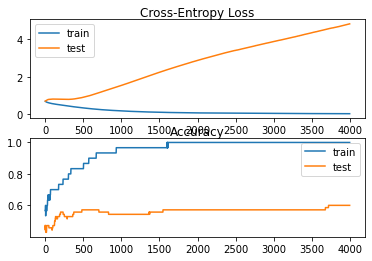

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Overfit MLP With Activation Regularization

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Report Activation Mean**. Update the example to calculate the mean activation of the regularized layer and confirm that indeed the activations have been made more sparse.
* **Grid Search**. Update the example to grid search different values for the regularization hyperparameter.
* **Alternate Norm**. Update the example to evaluate the L2 or L1 and L2 vector norm for regularizing the hidden layer outputs.
* **Repeated Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.

## Summary

In this tutorial, you discovered activation regularization as a technique to improve the generalization of learned features. Specifically, you learned:

* Neural networks learn features from data and models, such as autoencoders and encoder-decoder models, and explicitly seek effective learned representations.
* Similar to weights, large values in learned features, e.g., large activations, may indicate an overfit model.
* Adding penalties to the loss function that penalizes a model in proportion to the magnitude of the activations may result in more robust and generalized learned features.